In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from skopt import gp_minimize
from skopt.benchmarks import bench3

dimensions = [(-1.0, 1.0)]
res = gp_minimize(
    bench3, dimensions, search='lbfgs', maxiter=6,
    random_state=1, acq='LCB', n_start=1,
    n_restarts_optimizer=10)

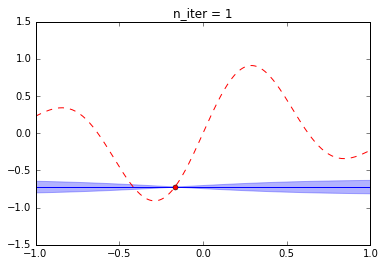

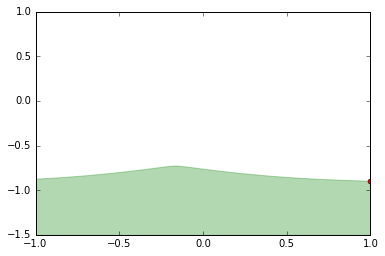

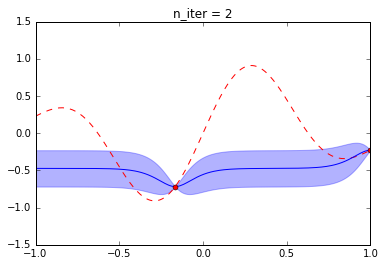

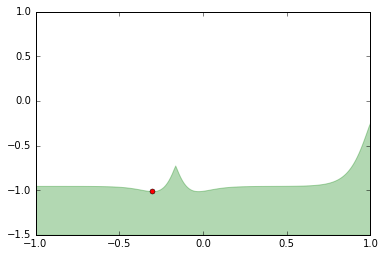

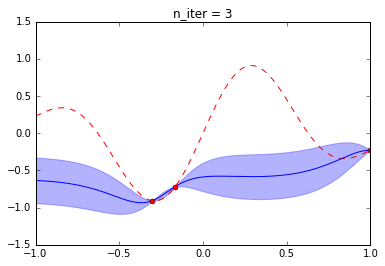

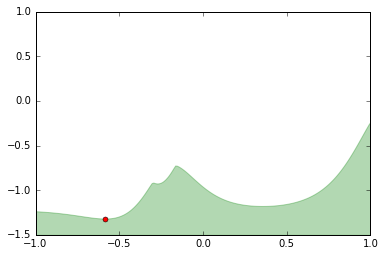

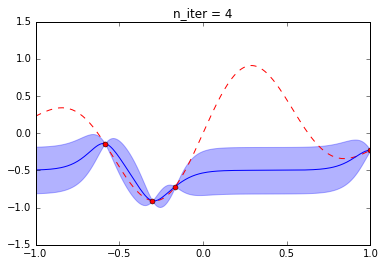

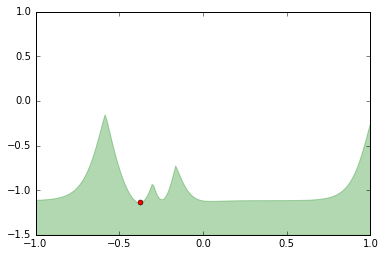

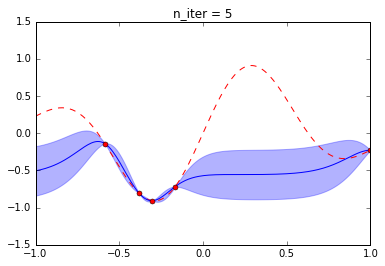

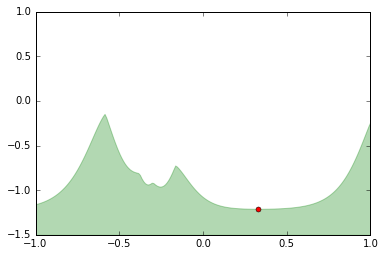

In [4]:
from skopt.acquisition import gaussian_lcb

x = np.linspace(-1, 1, 200)
func_values = [bench3(xi) for xi in x]
vals = np.reshape(x, (-1, 1))

best_xs = res.x_iters.ravel()
gp_models = res.models

for n_iter in range(5):
    gp_model = gp_models[n_iter]
    best_x = best_xs[:n_iter+1]

    posterior_mean, posterior_std = gp_model.predict(vals, return_std=True)
    acquis_values = gaussian_lcb(vals, gp_model)
    acquis_values = acquis_values.ravel()
    posterior_mean = posterior_mean.ravel()
    posterior_std = posterior_std.ravel()
    upper_bound = posterior_mean + posterior_std
    lower_bound = posterior_mean - posterior_std

    plt.plot(x, func_values, color='red', linestyle="--", label="true func")
    plt.plot(x, posterior_mean, color='blue', label="GP mean")
    plt.fill_between(
        x, lower_bound, upper_bound, alpha=0.3, color='blue', label="GP std")

    sampled_y = [bench3(x) for x in best_x]
    plt.plot(best_x, sampled_y, 'ro', label="observations", markersize=5)
    plt.title("n_iter = %d" % (n_iter + 1))
    plt.ylim([-1.5, 1.5])
    plt.show()

    plt.fill_between(x, -1.5, acquis_values, alpha=0.3, color='green', label="LCB values")
    min_ind = np.argmin(acquis_values)
    min_acq = acquis_values[min_ind]
    min_x = x[min_ind]

    plt.plot(min_x, min_acq, "ro", markersize=5, label="Next sample point")
    plt.ylim([-1.5, 1.0])

    plt.show()